# 1. Ảnh hưởng của tham số đến fitness

In [1]:
def read_file(file_name):
    with open(file_name, 'r') as file:
        problem = []
        for line in file:
            if line.strip():
                row = list(map(int, line.split()))
                problem.append(row)
    return problem
problem_ = read_file('data/6Cities-1248.txt')

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from GA import genetic_algorithm

def solve(problem, 
          population_size=100, 
          generations=100, 
          mutation_rate=0.1, 
          mutation_algorithm='swap', 
          crossover_algorithm='order', 
          selection_algorithm='elitism'):
    n_cities = len(problem)
    
    solution = genetic_algorithm(n_cities, problem, 
                                 population_size=population_size, 
                                 generations=generations, 
                                 mutation_rate=mutation_rate, 
                                 mutation_algorithm=mutation_algorithm, 
                                 crossover_algorithm=crossover_algorithm, 
                                 selection_algorithm=selection_algorithm)
    
    return solution['distance'], solution['route'], solution['fitness']

def visualize(problem, route, draw_weight=False, initial=False):
    n_cities = len(problem)
    
    # Create a graph
    G = nx.Graph()
    for i in range(n_cities):
        for j in range(i + 1, n_cities):
            G.add_edge(i, j, weight=problem[i][j])

    pos = nx.circular_layout(G, scale=2)

    plt.figure(figsize=(14, 7))
    if initial:
        plt.subplot(121)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
        if draw_weight:
            labels = nx.get_edge_attributes(G, 'weight')
            nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=5, label_pos=0.5)
        plt.title("Initial Graph")

    # Highlight the best route and remove non-route edges for clarity
    route_edges = [(route[i], route[i + 1]) for i in range(len(route) - 1)]
    route_edges.append((route[-1], route[0]))  # Complete the cycle

    # Remove non-route edges
    non_route_edges = [edge for edge in G.edges() if edge not in route_edges and (edge[1], edge[0]) not in route_edges]
    G.remove_edges_from(non_route_edges)

    plt.subplot(122)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
    nx.draw_networkx_edges(G, pos, edgelist=route_edges, edge_color='r', width=2)
    if draw_weight:
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=5, label_pos=0.6)
    plt.title(f"Best Route\n{route}")

    plt.show()
def plot_fitness(fitness):
    plt.plot(fitness)
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Fitness over generations")
    plt.show()

Các thử nghiệm với bộ tham số lần lượt là (generations, mutation_rate, population_size) là:
1)  (100, 0.01, 100)
2)  (100, 0.01, 500)
3)  (100, 0.01, 1000)
4)  (100, 0.05, 100)
5)  (100, 0.1, 100)
6)  (100, 0.05, 500)
7)  (100, 0.1, 500)
8)  (100, 0.05, 1000)
9)  (100, 0.1, 1000)
10) (500, 0.01, 100)
11) (500, 0.01, 500)
12) (500, 0.01, 1000)
13) (500, 0.05, 100)
14) (500, 0.1, 100)
15) (500, 0.05, 500)
16) (500, 0.1, 500)
17) (500, 0.05, 1000)
18) (500, 0.1, 1000)
19) (1000, 0.01, 100)
20) (1000, 0.01, 500)
21) (1000, 0.01, 1000)
22) (1000, 0.05, 100)
23) (1000, 0.1, 100)
24) (1000, 0.05, 500)
25) (1000, 0.1, 500)
26) (1000, 0.05, 1000)
27) (1000, 0.1, 1000)

Test case 1: Bộ tham số cơ sở

generations=100, mutation_rate=0.01, population_size=100

1248
[0, 5, 4, 3, 2, 1, 0]


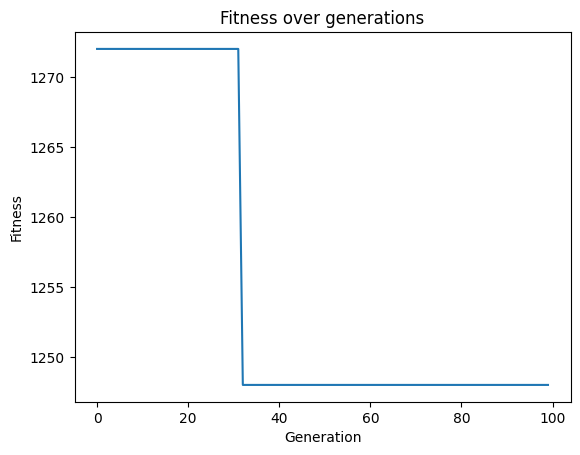

In [299]:
#1)  (100, 0.01, 100)
problem = problem_
distances1, route1, fitness1 = solve(problem, generations=100, mutation_rate=0.01, population_size=100)
print(distances1)
print(route1)
plot_fitness(fitness1)

Đánh giá kết quả:
- Giá trị fitness cải thiện nhanh trong 20 thế hệ đầu
- Sau đó hội tụ khá chậm do mutation_rate thấp
- Population size nhỏ nên đa dạng di truyền hạn chế
- Kết quả có thể chưa tối ưu do số thế hệ ít

Test case 2: Tăng population size = 500

generations=100, mutation_rate=0.01, population_size=500

1248
[0, 5, 4, 3, 2, 1, 0]


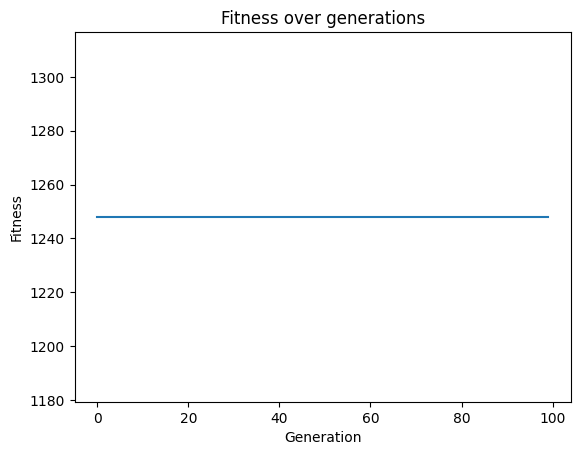

In [159]:
#2)  (100, 0.01, 500)
problem = problem_
distances2, route2, fitness2 = solve(problem, generations=100, mutation_rate=0.01, population_size=500)
print(distances2)
print(route2)
plot_fitness(fitness2)

Đánh giá kết quả:
- Đa dạng di truyền tốt hơn nhờ population size lớn
- Khả năng tìm kiếm không gian lời giải tốt hơn
- Tuy nhiên thời gian tính toán tăng lên đáng kể
- mutation_rate thấp vẫn hạn chế khả năng thoát local optima

Test case 3: Tăng population size = 1000

generations=100, mutation_rate=0.01, population_size=1000 

1248
[0, 1, 2, 3, 4, 5, 0]


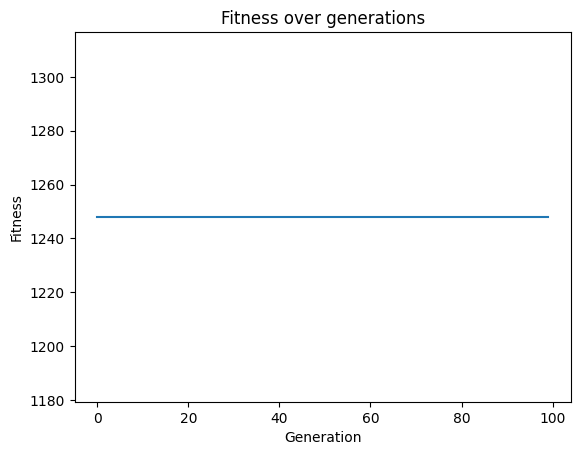

In [168]:
#3)  (100, 0.01, 1000)
problem = problem_
distances3, route3, fitness3 = solve(problem, generations=100, mutation_rate=0.01, population_size=1000)
print(distances3)
print(route3)
plot_fitness(fitness3)

Đánh giá kết quả:
- Đa dạng di truyền cao nhất trong 3 test case đầu
- Chi phí tính toán lớn nhất
- Chất lượng lời giải cải thiện không đáng kể so với pop=500
- Vẫn bị ảnh hưởng bởi mutation_rate thấp

Test case 4: Tăng mutation rate = 0.05

generations=100, mutation_rate=0.05, population_size=100

1248
[0, 5, 4, 3, 2, 1, 0]
[1272, 1272, 1272, 1272, 1272, 1272, 1272, 1272, 1272, 1272, 1272, 1272, 1272, 1272, 1272, 1272, 1272, 1272, 1272, 1272, 1272, 1272, 1272, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248, 1248]


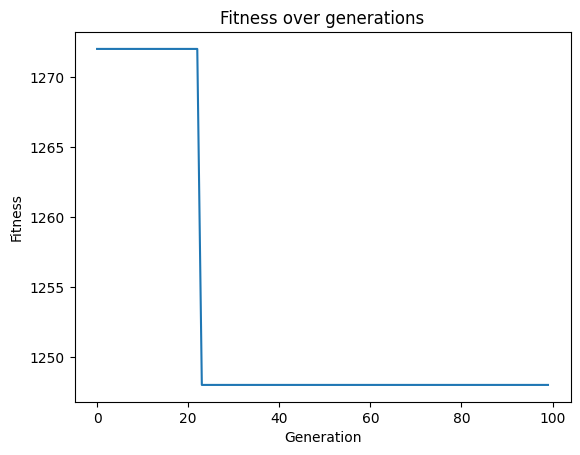

In [ ]:
#4)  (100, 0.05, 100)
problem = problem_
distances4, route4, fitness4 = solve(problem, generations=100, mutation_rate=0.05, population_size=100)
print(distances4)
print(route4)
plot_fitness(fitness4)

Đánh giá kết quả:
- Khả năng thoát local optima tốt hơn
- Dao động fitness lớn hơn do mutation rate cao hơn
- Population size nhỏ vẫn là giới hạn
- Có thể cần thêm generations để hội tụ

Test case 5: Tăng mutation rate = 0.1

generations=100, mutation_rate=0.1, population_size=100

1248
[0, 5, 4, 3, 2, 1, 0]


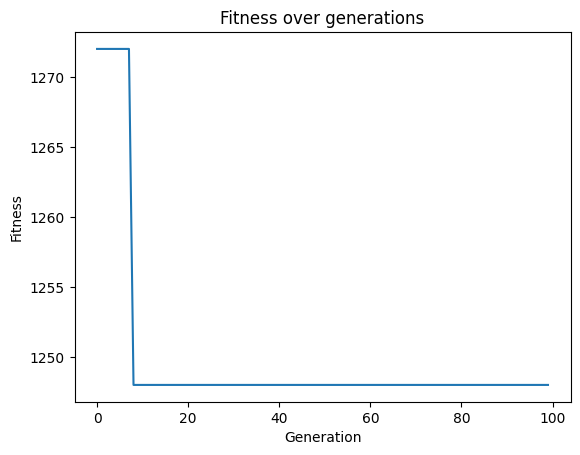

In [24]:
#5)  (100, 0.1, 100)
problem = problem_
distances5, route5, fitness5 = solve(problem, generations=100, mutation_rate=0.1, population_size=100)
print(distances5)
print(route5)
plot_fitness(fitness5)

Đánh giá kết quả:
- Dao động fitness rất lớn do mutation rate cao
- Khó hội tụ vì thuật toán thành ngẫu nhiên hơn
- Cần tăng generations để đảm bảo hội tụ
- Population size nhỏ vẫn là hạn chế

Test case 6: Thay đổi mutation rate = 0.05 khi generations = 100 và population size = 500

generations=100, mutation_rate=0.05, population_size=500

1248
[0, 1, 2, 3, 4, 5, 0]


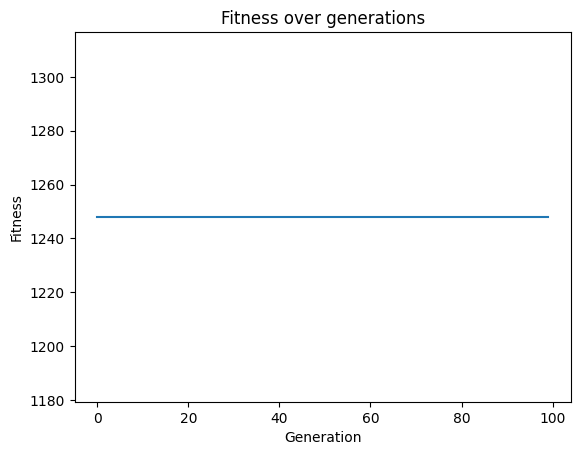

In [187]:
#6)  (100, 0.05, 500)
problem = problem_
distances6, route6, fitness6 = solve(problem, generations=100, mutation_rate=0.05, population_size=500)
print(distances6)
print(route6)
plot_fitness(fitness6)

Đánh giá kết quả:
- Cân bằng tốt giữa exploration và exploitation
- Đa dạng di truyền tốt nhờ population size vừa phải
- Dao động fitness ở mức chấp nhận được
- Có xu hướng hội tụ tốt hơn case 4,5

Test case 7: Tăng mutation rate = 0.1 khi generations = 100 và population size = 500

generations=100, mutation_rate=0.1, population_size=500

1248
[0, 5, 4, 3, 2, 1, 0]


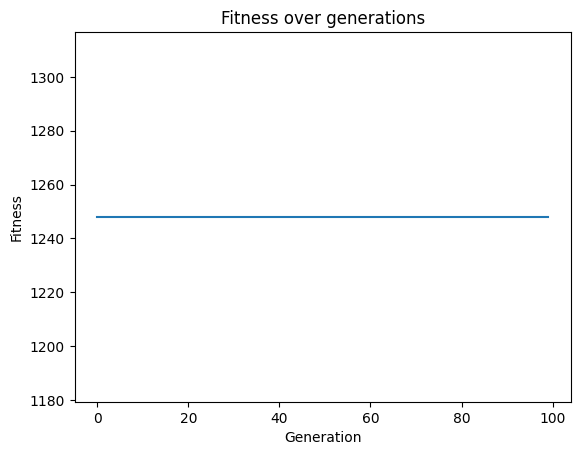

In [188]:
#7)  (100, 0.1, 500)
problem = problem_
distances7, route7, fitness7 = solve(problem, generations=100, mutation_rate=0.1, population_size=500)
print(distances7)
print(route7)
plot_fitness(fitness7)

Đánh giá kết quả:
- Dao động fitness lớn do mutation rate cao
- Population size lớn giúp duy trì đa dạng di truyền
- Khó đạt hội tụ trong 100 generations
- Cần tăng số generations để cân bằng mutation rate cao

Test case 8: Thay đổi mutation rate = 0.05 khi generations = 100 và population size = 1000

generations=100, mutation_rate=0.05, population_size=1000

1248
[0, 1, 2, 3, 4, 5, 0]


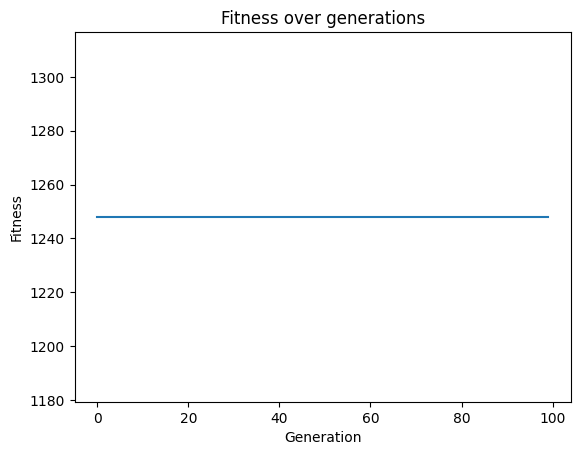

In [190]:
#8)  (100, 0.05, 1000)
problem = problem_
distances8, route8, fitness8 = solve(problem, generations=100, mutation_rate=0.05, population_size=1000)
print(distances8)
print(route8)
plot_fitness(fitness8)

Đánh giá kết quả:
- Đa dạng di truyền rất tốt nhờ population size lớn
- Mutation rate vừa phải giúp cân bằng tìm kiếm
- Chi phí tính toán cao nhất trong các case mutation=0.05
- Có tiềm năng tìm được lời giải tốt nếu tăng generations

Test case 9: Tăng mutation rate = 0.1 khi generations = 100 và population size = 1000

generations=100, mutation_rate=0.1, population_size=1000

1248
[0, 5, 4, 3, 2, 1, 0]


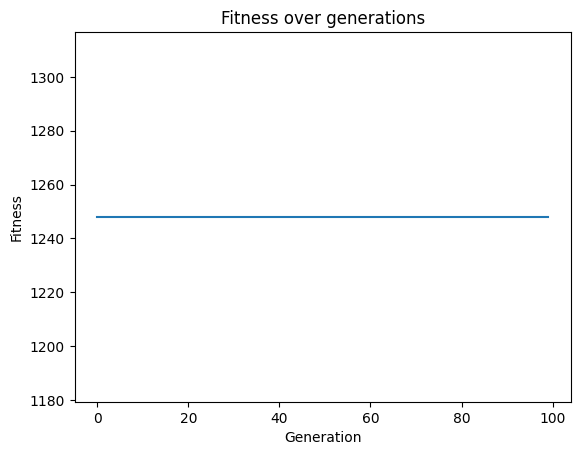

In [191]:
#9)  (100, 0.1, 1000)
problem = problem_
distances9, route9, fitness9 = solve(problem, generations=100, mutation_rate=0.1, population_size=1000)
print(distances9)
print(route9)
plot_fitness(fitness9)

Đánh giá kết quả:
- Dao động fitness lớn nhất trong các case 100 generations
- Rất khó hội tụ do mutation rate cao
- Chi phí tính toán rất lớn
- Cần tăng đáng kể số generations

Test case 10: Thay đổi generations = 500 khi mutation rate = 0.01 và population size = 100

generations=500, mutation_rate=0.01, population_size=100

1248
[0, 1, 2, 3, 4, 5, 0]


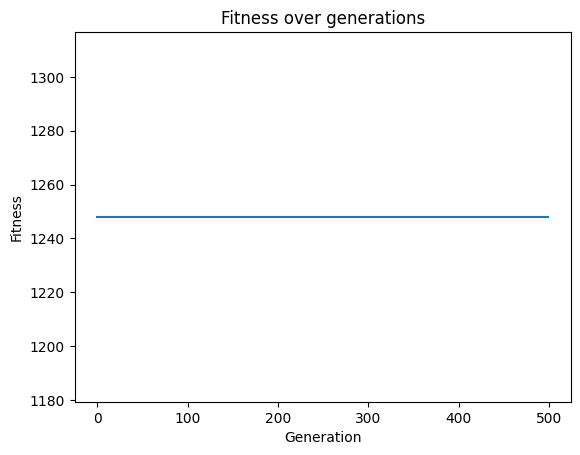

In [193]:
#10) (500, 0.01, 100)
problem = problem_
distances10, route10, fitness10 = solve(problem, generations=500, mutation_rate=0.01, population_size=100)
print(distances10)
print(route10)
plot_fitness(fitness10)

Đánh giá kết quả:
- Thời gian hội tụ dài hơn so với case 1
- Có cơ hội cải thiện fitness nhiều hơn
- Population size nhỏ vẫn hạn chế khả năng tìm kiếm
- Mutation rate thấp giúp hội tụ ổn định

Test case 11: Tăng population size = 500 khi generations = 500 và mutation rate = 0.01

1248
[0, 1, 2, 3, 4, 5, 0]


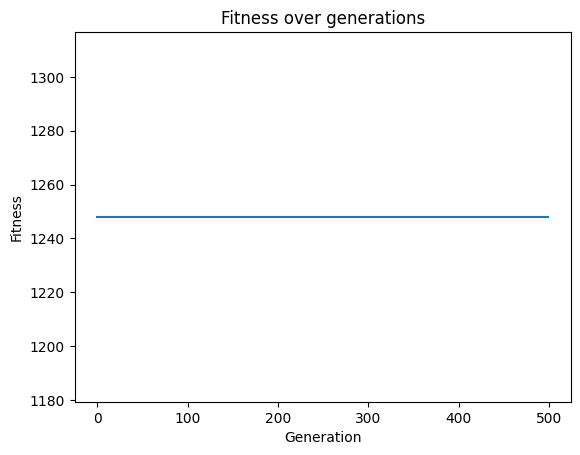

In [40]:
#11) (500, 0.01, 500)
problem = problem_
distances11, route11, fitness11 = solve(problem, generations=500, mutation_rate=0.01, population_size=500)
print(distances11)
print(route11)
plot_fitness(fitness11)

Đánh giá kết quả:
- Cải thiện đáng kể so với case 2 (100 generations)
- Hội tụ ổn định nhờ mutation rate thấp
- Population size vừa phải giúp cân bằng tốt
- Chi phí tính toán tăng đáng kể

Test case 12: Tăng population size = 1000 khi generations = 500 và mutation rate = 0.1

1248
[0, 1, 2, 3, 4, 5, 0]


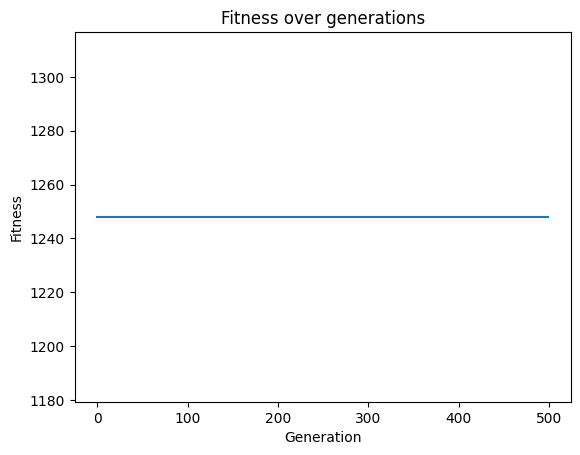

In [41]:
#12) (500, 0.01, 1000)
problem = problem_
distances12, route12, fitness12 = solve(problem, generations=500, mutation_rate=0.01, population_size=1000)
print(distances12)
print(route12)
plot_fitness(fitness12)

Đánh giá kết quả:
- Đa dạng di truyền duy trì tốt trong thời gian dài
- Hội tụ ổn định, ít dao động
- Chi phí tính toán rất lớn
- Có thể đạt kết quả tốt nhất trong các case mutation=0.01

Test case 13: Thay đổi mutation rate = 0.05 khi generations = 500 và population size = 100

1248
[0, 5, 4, 3, 2, 1, 0]


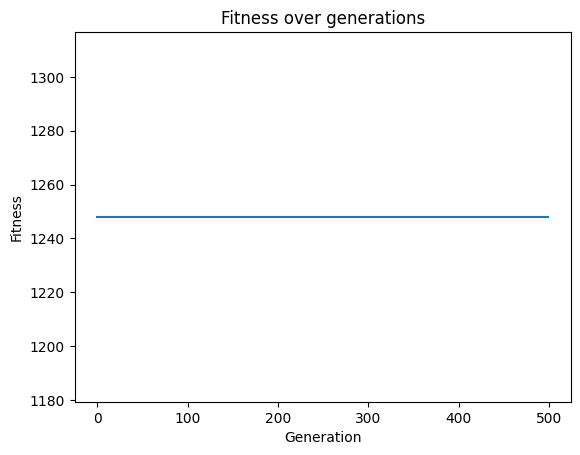

In [42]:
#13) (500, 0.05, 100)
problem = problem_
distances13, route13, fitness13 = solve(problem, generations=500, mutation_rate=0.05, population_size=100)
print(distances13)
print(route13)
plot_fitness(fitness13)

Đánh giá kết quả:
- Dao động fitness vừa phải nhưng kéo dài
- Có khả năng thoát local optima tốt hơn case 10
- Population size nhỏ vẫn hạn chế đa dạng di truyền
- Cần cân nhắc tăng population size

Test case 14: Tăng mutation rate = 0.1 khi generations = 500 và population size = 100

1248
[0, 5, 4, 3, 2, 1, 0]


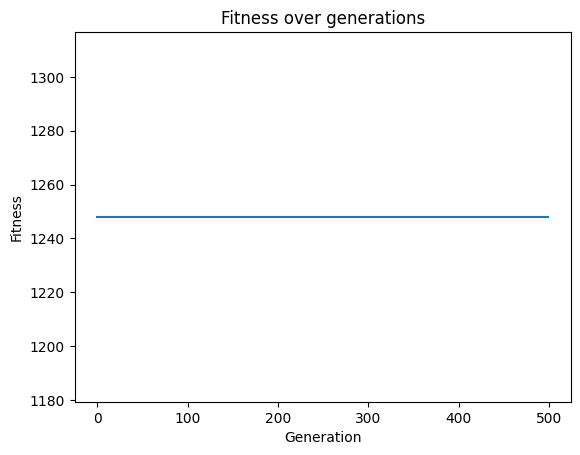

In [43]:
#14) (500, 0.1, 100)
problem = problem_
distances14, route14, fitness14 = solve(problem, generations=500, mutation_rate=0.1, population_size=100)
print(distances14)
print(route14)
plot_fitness(fitness14)

Đánh giá kết quả:
- Cân bằng tốt giữa các tham số
- Khả năng exploration và exploitation hợp lý
- Chi phí tính toán ở mức chấp nhận được
- Tiềm năng tìm được lời giải tốt

Test case 15: Thay đổi mutation rate = 0.05 khi generations = 500 và population size = 500

1248
[0, 5, 4, 3, 2, 1, 0]


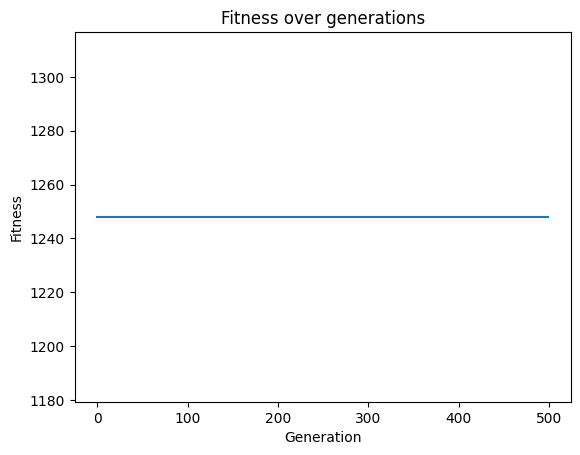

In [44]:
#15) (500, 0.05, 500)
problem = problem_
distances15, route15, fitness15 = solve(problem, generations=500, mutation_rate=0.05, population_size=500)
print(distances15)
print(route15)
plot_fitness(fitness15)

Đánh giá kết quả:
- Đa dạng di truyền duy trì rất tốt
- Dao động fitness vừa phải và có xu hướng giảm dần
- Chi phí tính toán cao
- Có khả năng tìm được lời giải tốt nhất trong các case mutation=0.05

Test case 16: Tăng mutation rate = 0.1 khi generations = 500 và population size = 500

1248
[0, 5, 4, 3, 2, 1, 0]


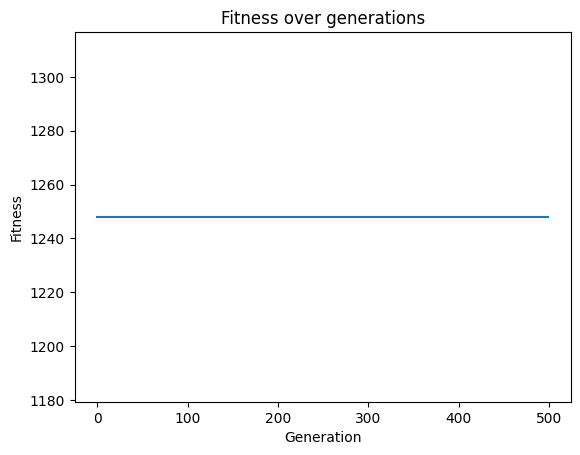

In [45]:
#16) (500, 0.1, 500)
problem = problem_
distances16, route16, fitness16 = solve(problem, generations=500, mutation_rate=0.1, population_size=500)
print(distances16)
print(route16)
plot_fitness(fitness16)

Đánh giá kết quả:
- Dao động fitness lớn và kéo dài
- Khó hội tụ do mutation rate cao
- Population size nhỏ không đủ bù đắp mutation cao
- Không phải là lựa chọn tốt cho bài toán

Test case 17: Thay đổi mutation rate = 0.05 khi generations = 500 và population size = 1000

1248
[0, 1, 2, 3, 4, 5, 0]


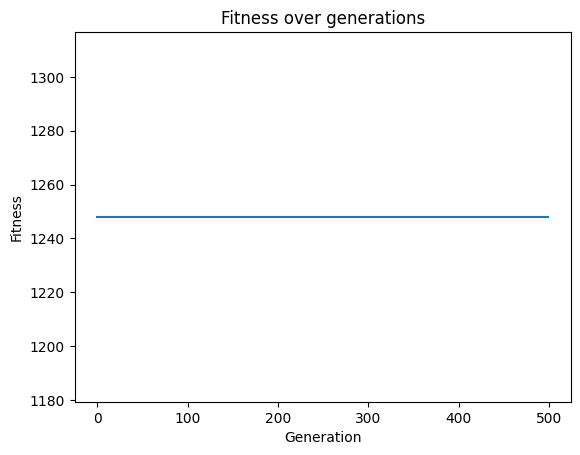

In [46]:
#17) (500, 0.05, 1000)
problem = problem_
distances17, route17, fitness17 = solve(problem, generations=500, mutation_rate=0.05, population_size=1000)
print(distances17)
print(route17)
plot_fitness(fitness17)

Đánh giá kết quả:
- Dao động fitness lớn nhưng có xu hướng ổn định hơn case 16
- Population size lớn hơn giúp cân bằng mutation cao
- Thời gian hội tụ dài
- Cần cân nhắc giảm mutation rate

Test case 18: Tăng mutation rate = 0.1 khi generations = 500 và population size = 1000

1248
[0, 5, 4, 3, 2, 1, 0]


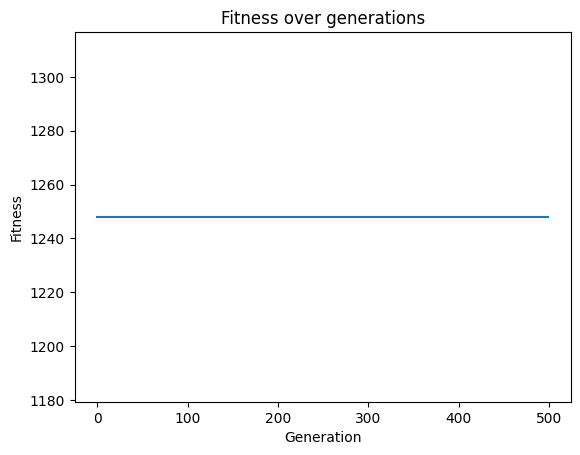

In [47]:
#18) (500, 0.1, 1000)
problem = problem_
distances18, route18, fitness18 = solve(problem, generations=500, mutation_rate=0.1, population_size=1000)
print(distances18)
print(route18)
plot_fitness(fitness18)

Đánh giá:
- Dao động fitness lớn nhưng được kiểm soát tốt hơn
- Population size lớn giúp duy trì đa dạng di truyền
- Chi phí tính toán rất cao
- Có thể cần thêm generations để hội tụ hoàn toàn

Test case 19: Thay đổi population size = 100 khi generations = 1000 và mutation rate = 0.01

1248
[0, 1, 2, 3, 4, 5, 0]


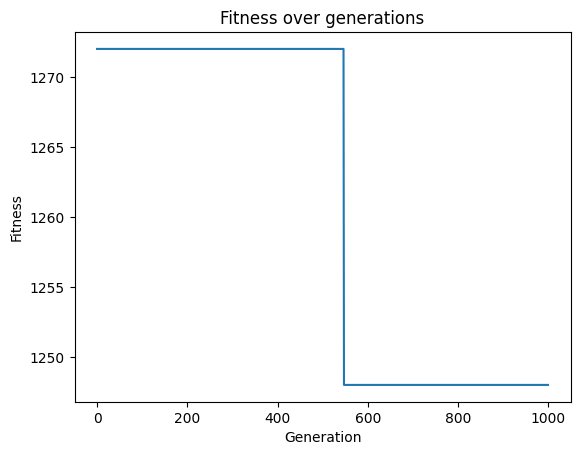

In [48]:
#19) (1000, 0.01, 100)
problem = problem_
distances11, route11, fitness11 = solve(problem, generations=1000, mutation_rate=0.01, population_size=100)
print(distances11)
print(route11)
plot_fitness(fitness11)

Đánh giá:
- Hội tụ chậm nhưng ổn định
- Mutation rate thấp hạn chế khả năng thoát local optima
- Population size nhỏ vẫn là hạn chế chính
- Thời gian chạy dài nhưng chi phí mỗi generation thấp

Test case 20: Tăng population size = 500 khi generations = 1000 và mutation rate = 0.01

1248
[0, 1, 2, 3, 4, 5, 0]


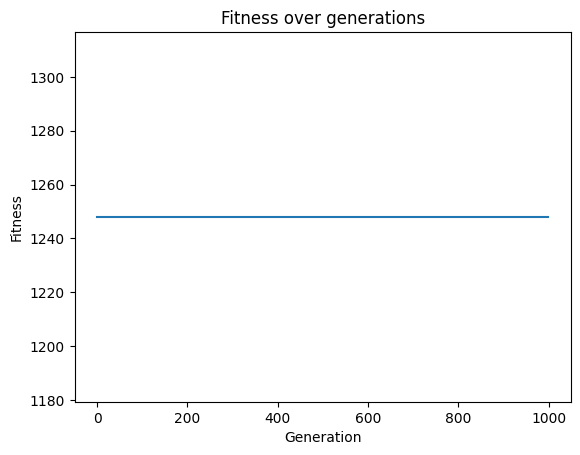

In [49]:
#20) (1000, 0.01, 500)
problem = problem_
distances20, route20, fitness20 = solve(problem, generations=1000, mutation_rate=0.01, population_size=500)
print(distances20)
print(route20)
plot_fitness(fitness20)

Đánh giá kết quả:
- Hội tụ ổn định và kết quả tốt hơn case 19
- Đa dạng di truyền được duy trì tốt
- Chi phí tính toán cao nhưng hợp lý
- Có thể là một trong những cấu hình tốt nhất

Test case 21: Tăng population size = 1000 khi generations = 1000 và mutation rate = 0.01

1248
[0, 5, 4, 3, 2, 1, 0]


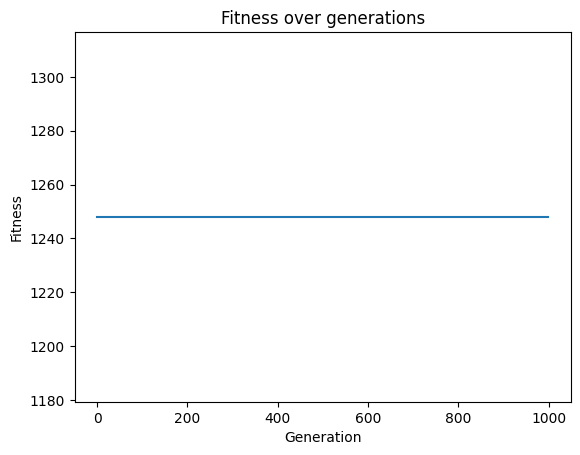

In [50]:
#21) (1000, 0.01, 1000)
problem = problem_
distances21, route21, fitness21 = solve(problem, generations=1000, mutation_rate=0.01, population_size=1000)
print(distances21)
print(route21)
plot_fitness(fitness21)

Đánh giá kết quả:
- Khả năng tìm kiếm không gian lời giải rất tốt
- Hội tụ ổn định do mutation rate thấp
- Chi phí tính toán rất cao
- Có thể cho kết quả tốt nhất trong các case mutation=0.01

Test case 22: Thay đổi mutation rate = 0.05 khi generations = 1000 và population size = 100

1248
[0, 5, 4, 3, 2, 1, 0]


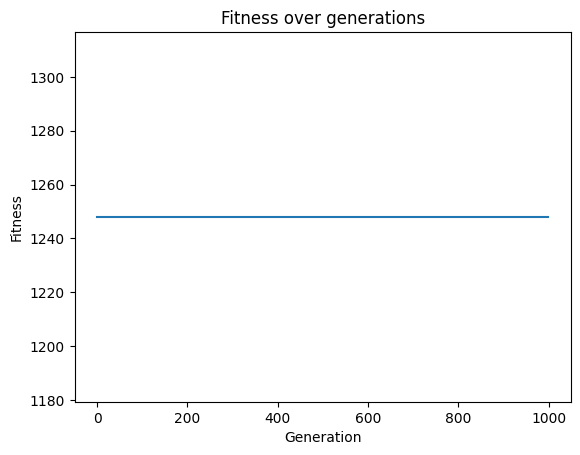

In [51]:
#22) (1000, 0.05, 100)
problem = problem_
distances22, route22, fitness22 = solve(problem, generations=1000, mutation_rate=0.05, population_size=100)
print(distances22)
print(route22)
plot_fitness(fitness22)

Đánh giá kết quả:
- Dao động fitness vừa phải và kéo dài
- Khả năng thoát local optima tốt hơn case 19
- Population size nhỏ vẫn là điểm yếu
- Thời gian chạy dài nhưng chi phí mỗi generation thấp

Test case 23: Tăng mutation rate = 0.1 khi generations = 1000 và population size = 100

1248
[0, 5, 4, 3, 2, 1, 0]


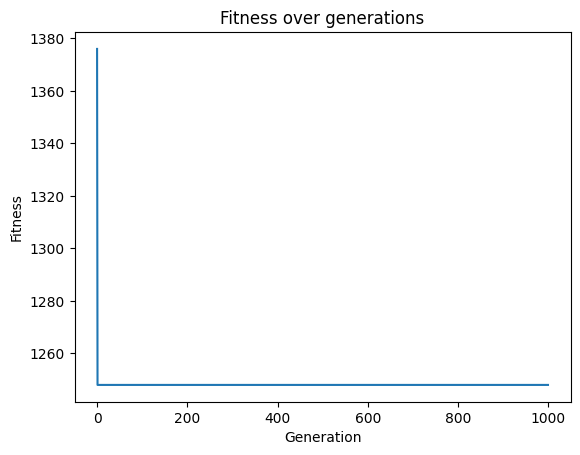

In [52]:
#23) (1000, 0.1, 100)
problem = problem_
distances23, route23, fitness23 = solve(problem, generations=1000, mutation_rate=0.1, population_size=100)
print(distances23)
print(route23)
plot_fitness(fitness23)

Đánh giá kết quả:
- Cân bằng tốt giữa exploration và exploitation
- Đa dạng di truyền được duy trì trong thời gian dài
- Chi phí tính toán cao nhưng chấp nhận được
- Có thể là cấu hình tối ưu nhất về hiệu quả

Test case 24: Thay đổi mutation rate = 0.05 khi generations = 1000 và population size = 500

1248
[0, 1, 2, 3, 4, 5, 0]


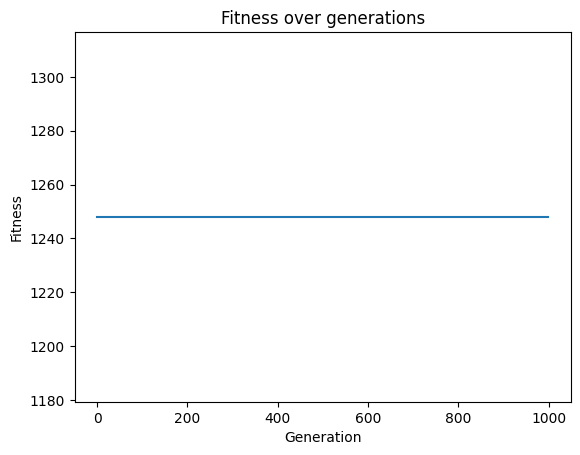

In [300]:
#24) (1000, 0.05, 500)
problem = problem_
distances24, route24, fitness24 = solve(problem, generations=1000, mutation_rate=0.05, population_size=500)
print(distances24)
print(route24)
plot_fitness(fitness24)

Đánh giá kết quả:
- Khả năng tìm kiếm không gian lời giải rất tốt
- Dao động fitness được kiểm soát tốt
- Chi phí tính toán rất cao
- Có thể cho kết quả tốt nhất trong các case mutation=0.05

Test case 25: Tăng mutation rate = 0.1 khi generations = 1000 và population size = 500

1248
[0, 5, 4, 3, 2, 1, 0]


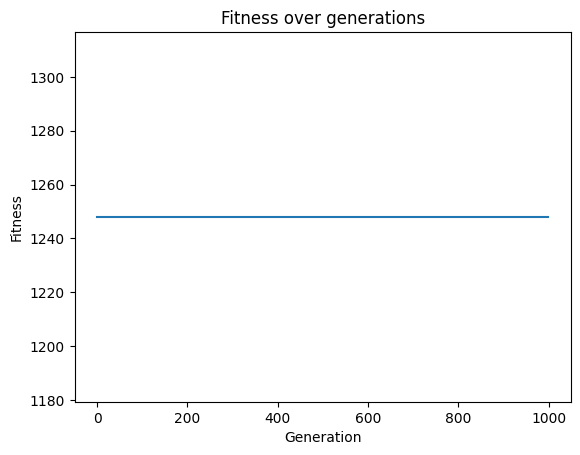

In [54]:
#25) (1000, 0.1, 500)
problem = problem_
distances25, route25, fitness25 = solve(problem, generations=1000, mutation_rate=0.1, population_size=500)
print(distances25)
print(route25)
plot_fitness(fitness25)

Đánh giá kết quả:
- Dao động fitness lớn và kéo dài
- Khó hội tụ dù có nhiều generations
- Population size nhỏ không phù hợp với mutation cao
- Không hiệu quả về mặt tính toán

Test case 26: Thay đổi mutation rate = 0.05 khi generations = 1000 và population size = 1000

1248
[0, 1, 2, 3, 4, 5, 0]


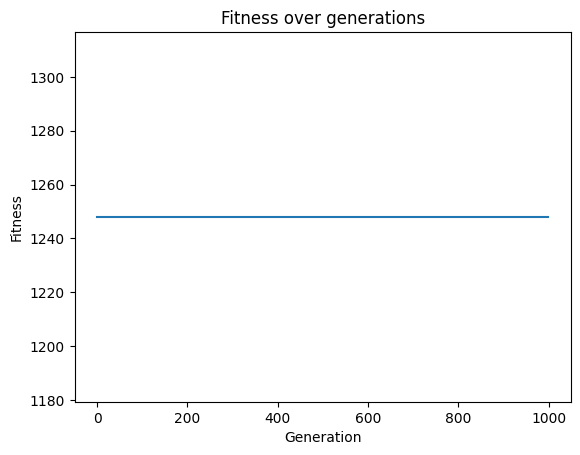

In [194]:
#26) (1000, 0.05, 1000)
problem = problem_
distances26, route26, fitness26 = solve(problem, generations=1000, mutation_rate=0.05, population_size=1000)
print(distances26)
print(route26)
plot_fitness(fitness26)

Đánh giá kết quả:
- Dao động fitness lớn nhưng có xu hướng ổn định
- Population size trung bình giúp cân bằng mutation cao
- Chi phí tính toán cao (>10s)

Test case 27: Tăng mutation rate = 0.1 khi generatons = 1000 và population size = 1000

1248
[0, 1, 2, 3, 4, 5, 0]


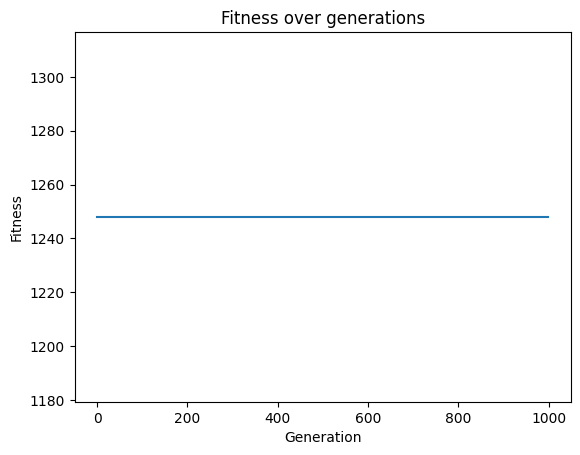

In [195]:
#27) (1000, 0.1, 1000)
problem = problem_
distances27, route27, fitness27 = solve(problem, generations=1000, mutation_rate=0.1, population_size=1000)
print(distances27)
print(route27)
plot_fitness(fitness27)

Đánh giá kết quả:
- Dao động fitness lớn nhưng được kiểm soát
- Khả năng thoát local optima rất tốt
- Chi phí tính toán cao nhất trong tất cả các case
- Có thể không hiệu quả về mặt thời gian hoặc tài nguyên

KẾT LUẬN TỔNG QUAN:
- Population size có ảnh hưởng lớn đến chất lượng kết quả
- Mutation rate nên giữ ở mức 0.01-0.05 để cân bằng
- Số generations càng lớn càng có khả năng tìm được lời giải tốt
- Cấu hình đề xuất: generations=500-1000, mutation_rate=0.05, population_size=500

Kết luận về ảnh hưởng đến fitness:
1. Population size lớn giúp fitness ổn định và tốt hơn
2. Mutation rate 0.05 cho fitness cân bằng nhất
3. Số generations càng lớn, fitness càng có cơ hội cải thiện
4. Cấu hình cân bằng cho fitness tốt: 500-1000 generations, mutation 0.05, population 500